# Data Preparation

## Importing Packages

In [ ]:
# Importing the Libraries

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression, Lasso, Ridge

import warnings
warnings.filterwarnings('ignore')

## Reading the Dataset

In [ ]:
# Read the Breast Cancer Dataset

data = pd.read_csv('breast_cancer.csv')

In [ ]:
# Explore the dataset

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Cleaning the Dataset

In [ ]:
# Checking for missing values 

data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# Dropping the ID Column 

data = data.drop(['id'], axis = 1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Check for duplicates 

data.duplicated().value_counts()

False    569
Name: count, dtype: int64

In [ ]:
# Use Label Encoder to encode the diagnosis 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Counting the number of benign and malignant
print(data['diagnosis'].value_counts())

# Transforming the diagnosis column
data['diagnosis'] = le.fit_transform(data['diagnosis'])

# Counting the number of 0s and 1s in the diagnosis
print(data['diagnosis'].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64
diagnosis
0    357
1    212
Name: count, dtype: int64


In [ ]:
# Handling Outliers

with_outliers = []
without_outliers = []

# Calculate the mean and standard deviation for each column
for column in data.columns:
    mean = data[column].mean()
    sd = data[column].std()
    
    # Define the boundaries
    lower_bound = mean - 3*sd
    upper_bound = mean + 3*sd
    
    # Find outliers
    outliers_below = data[column] < lower_bound
    outliers_above = data[column] > upper_bound

    #Replace outliers
   
    with_outliers_count = outliers_below.sum() + outliers_above.sum()
    with_outliers.append(column + " " + str(with_outliers_count))

    data[column][outliers_below] =  mean-3*sd
    data[column][outliers_above] =  mean+3*sd

    without_outliers_count = (data[column] < lower_bound).sum() + (data[column] > upper_bound).sum()
    without_outliers.append(column + " " + str(without_outliers_count))



print("With Outliers: ",with_outliers)
print("Without Outliers: ",without_outliers)

With Outliers:  ['diagnosis 0', 'radius_mean 5', 'texture_mean 4', 'perimeter_mean 7', 'area_mean 8', 'smoothness_mean 5', 'compactness_mean 9', 'concavity_mean 9', 'concave points_mean 6', 'symmetry_mean 5', 'fractal_dimension_mean 7', 'radius_se 7', 'texture_se 9', 'perimeter_se 8', 'area_se 6', 'smoothness_se 7', 'compactness_se 12', 'concavity_se 6', 'concave points_se 6', 'symmetry_se 11', 'fractal_dimension_se 10', 'radius_worst 6', 'texture_worst 4', 'perimeter_worst 6', 'area_worst 10', 'smoothness_worst 3', 'compactness_worst 10', 'concavity_worst 7', 'concave points_worst 0', 'symmetry_worst 9', 'fractal_dimension_worst 9']
Without Outliers:  ['diagnosis 0', 'radius_mean 0', 'texture_mean 0', 'perimeter_mean 0', 'area_mean 0', 'smoothness_mean 0', 'compactness_mean 0', 'concavity_mean 0', 'concave points_mean 0', 'symmetry_mean 0', 'fractal_dimension_mean 0', 'radius_se 0', 'texture_se 0', 'perimeter_se 0', 'area_se 0', 'smoothness_se 0', 'compactness_se 0', 'concavity_se 0',

## Splitting the Dataset

In [ ]:
# Splitting the Dataset into Training Set and Test Set

from sklearn.model_selection import train_test_split 

# Splitting the dataset into dependent and independent variables
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

# Splitting the dataset into 20% test set and 80% training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


## Feature Scaling

In [ ]:
# Scale the X data using normalization 
from sklearn.preprocessing import MinMaxScaler

# Fit and transform the train data
min_max = MinMaxScaler()

X_train_scaled = min_max.fit_transform(X_train)
X_test_scaled = min_max.transform(X_test)

## 

# Support Vector Machines

In [ ]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

pipeline = Pipeline([
    ('rfe', RFE(estimator=SVC(kernel='linear', random_state=7))),
    ('svm', SVC(random_state=42))
])

param_grid = {
    'rfe__n_features_to_select': [5, 10, 15, 20],  # Number of features to select with RFE
    'svm__C': [0.1, 1, 10],                        # SVM regularization parameter
    'svm__kernel': ['linear', 'rbf', 'poly']      # SVM kernel type
}

# grid search with cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipeline, param_grid, cv=k_fold, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


Best parameters: {'rfe__n_features_to_select': 15, 'svm__C': 0.1, 'svm__kernel': 'poly'}
Best cross-validation score: 0.9846153846153847
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Learning Curves

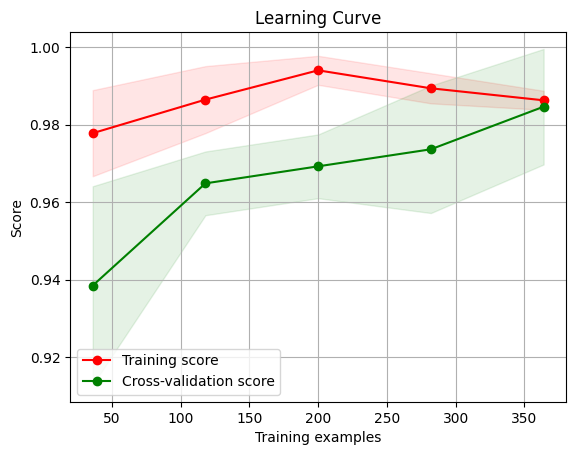

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(grid_search.best_estimator_, "Learning Curve", X_train_scaled, y_train, cv=k_fold)
plt.show()

## Confusion Matrix

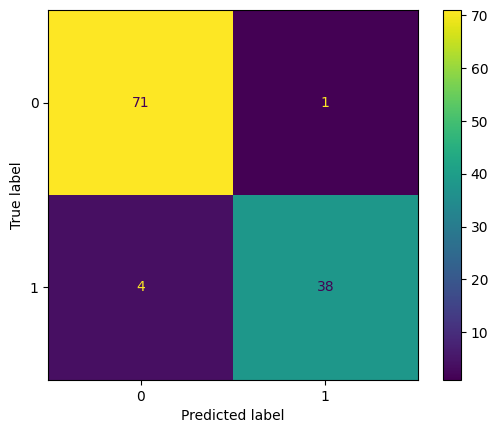

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


matrix_best = metrics.confusion_matrix(y_test, y_pred)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix_best)
disp.plot()

## Bias vs Variance

In [ ]:
from mlxtend.evaluate import bias_variance_decomp

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    best_model, X_train_scaled, y_train.values, X_test_scaled, y_test.values, 
    loss='0-1_loss', random_seed=7)

print(f'Average Expected Loss: {avg_expected_loss}')
print(f'Average Bias: {avg_bias}')
print(f'Average Variance: {avg_var}')

Average Expected Loss: 0.04771929824561403
Average Bias: 0.03508771929824561
Average Variance: 0.015


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e2ba32df-4aa7-41f3-88ee-6f78f0f6d42c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>